# Data Loading and Exploration

We load the medical dataset and inspect its structure.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("medical_risk_dataset.csv")

df.head()

,age,bmi,blood_pressure,cholesterol,max_heart_rate,glucose_level,smoker,exercise_hours_per_week,stress_level,family_history,heart_disease
0,25,22.5,120,180,170,90,0,5,3,0,0
1,52,29.4,145,240,140,110,1,1,7,1,1
2,47,31.2,150,260,135,115,1,0,8,1,1
3,30,24.1,118,190,175,95,0,4,4,0,0
4,60,33.5,160,280,120,130,1,0,9,1,1


In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      15 non-null     int64  
 1   bmi                      15 non-null     float64
 2   blood_pressure           15 non-null     int64  
 3   cholesterol              15 non-null     int64  
 4   max_heart_rate           15 non-null     int64  
 5   glucose_level            15 non-null     int64  
 6   smoker                   15 non-null     int64  
 7   exercise_hours_per_week  15 non-null     int64  
 8   stress_level             15 non-null     int64  
 9   family_history           15 non-null     int64  
 10  heart_disease            15 non-null     int64  
dtypes: float64(1), int64(10)
memory usage: 1.4 KB


In [3]:
df.describe()

,age,bmi,blood_pressure,cholesterol,max_heart_rate,glucose_level,smoker,exercise_hours_per_week,stress_level,family_history,heart_disease
count,15.00000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,43.80000,28.373333,139.200000,229.333333,148.00000,108.266667,0.533333,2.200000,6.066667,0.533333,0.533333
std,12.13731,3.807599,16.776685,37.837371,22.62426,15.097146,0.516398,2.111195,2.120198,0.516398,0.516398
min,25.00000,22.500000,115.000000,170.000000,115.00000,88.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,34.00000,25.200000,123.500000,197.500000,127.50000,95.500000,0.000000,0.500000,4.000000,0.000000,0.000000
50%,45.00000,29.000000,142.000000,230.000000,145.00000,108.000000,1.000000,1.000000,6.000000,1.000000,1.000000
75%,53.50000,31.450000,152.500000,257.500000,169.00000,119.000000,1.000000,4.000000,8.000000,1.000000,1.000000
max,62.00000,34.100000,165.000000,290.000000,178.00000,135.000000,1.000000,6.000000,9.000000,1.000000,1.000000


# Exploratory Data Analysis

Analyze class distribution and feature correlations.

In [5]:
df['heart_disease'].value_counts()

heart_disease
1    8
0    7
Name: count, dtype: int64

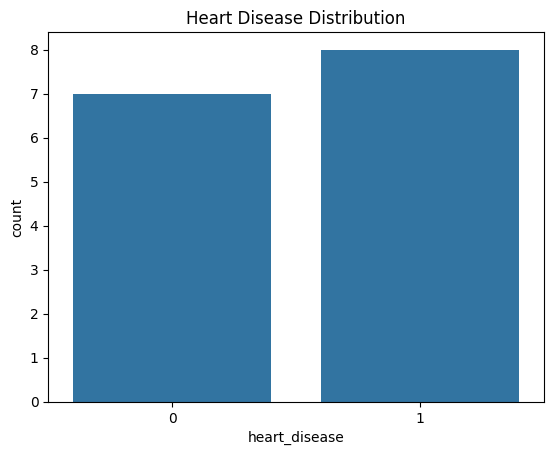

In [6]:
sns.countplot(x='heart_disease', data=df)
plt.title("Heart Disease Distribution")
plt.show()

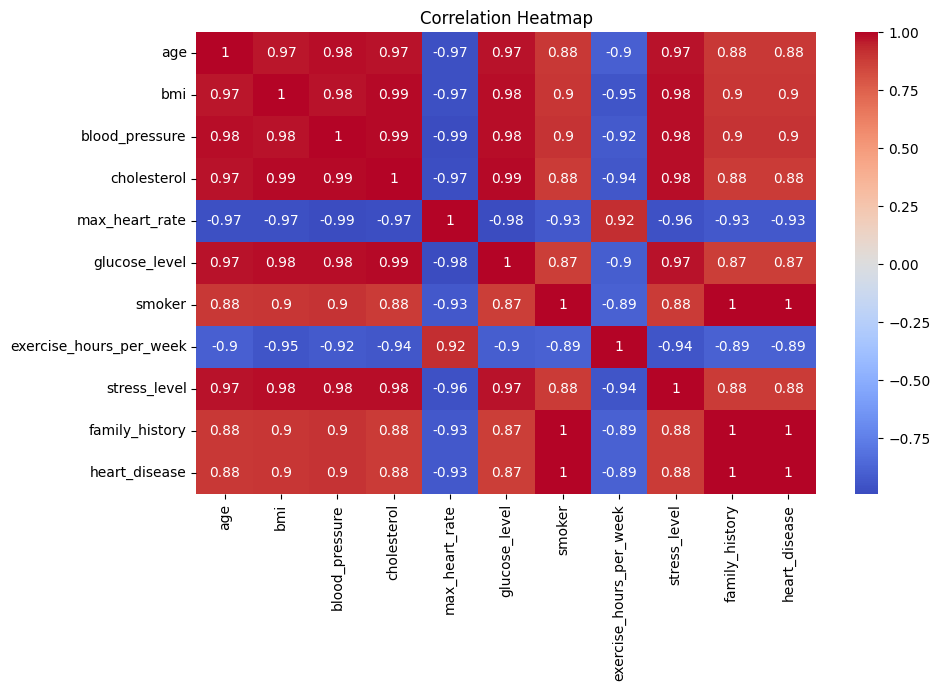

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [8]:
X = df.drop("heart_disease", axis=1)
y = df["heart_disease"]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine'],
    'p': [1, 2, 3]
}

knn = KNeighborsClassifier()

cv = StratifiedKFold(n_splits=5)

grid = GridSearchCV(
    knn,
    param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:927: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 916, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 317, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 409, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>.

In [13]:
best_knn = grid.best_estimator_
best_knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",1
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'euclidean'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


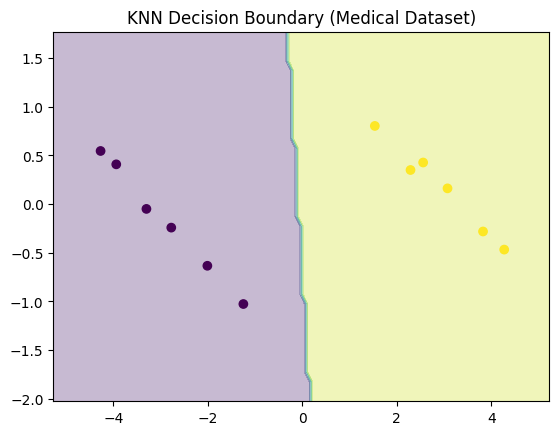

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_train)

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_train)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train)
plt.title("KNN Decision Boundary (Medical Dataset)")
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = best_knn.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1 0]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Accuracy: 1.0
